In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

In [2]:
def show(img,vmin=0,vmax=255,vmset=False):
    plt.figure(figsize=(7,7))
    if vmset:
        plt.imshow(img,cmap="gray")
    else:
        plt.imshow(img,cmap="gray",vmin=vmin,vmax=vmax)
    plt.show()

# Part 1:
reading MRI_Noisy.png:

In [3]:
mri_noisy=cv2.imread("MRI_Noisy.png",cv2.IMREAD_GRAYSCALE)
mri_noisy.dtype,mri_noisy.shape

(dtype('uint8'), (372, 341))

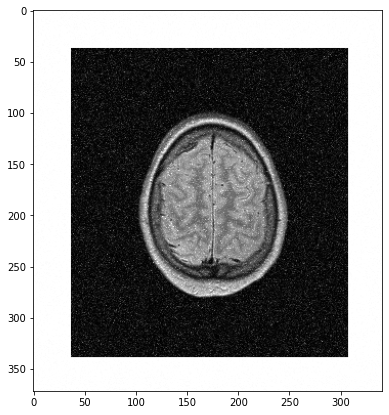

In [4]:
show(mri_noisy)

# Part 2:

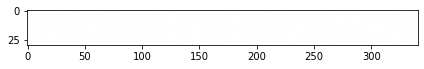

In [5]:
hashie_navar=mri_noisy.copy()
hashie_navar=hashie_navar[:30,:]
show(hashie_navar)

In [6]:
bins=[]
for i in range(250,256):
    bins.append(i)

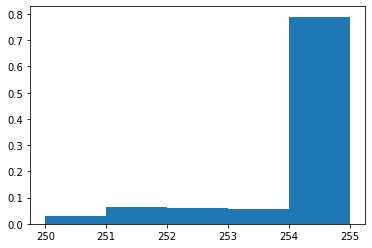

In [7]:
plt.hist(hashie_navar.ravel(),bins=bins,density=True)
plt.show()

# Part 3:

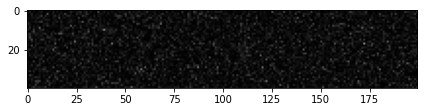

In [8]:
black_navar=mri_noisy.copy()
black_navar=black_navar[50:90,50:250]
show(black_navar)

In [9]:
bins2=[]
for i in range(0,100):
    bins2.append(i)

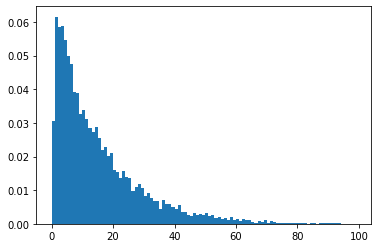

In [10]:
plt.hist(black_navar.ravel(),bins=bins2,density=True)
plt.show()

همانطور که در نمودار بالا می بینیم توزیع نویز

erlang(gamma)
یا شاید
exponential

می باشد

# Part 4:

In [11]:
dental_noisy=cv2.imread("DentalXray_Noisy.png",cv2.IMREAD_GRAYSCALE)
dental_noisy.dtype,dental_noisy.shape

(dtype('uint8'), (674, 882))

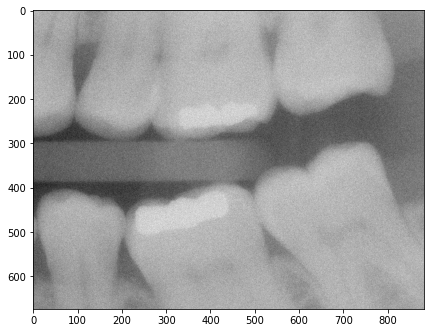

In [12]:
show(dental_noisy)

In [13]:
bins3=[]
for i in range(0,255):
    bins3.append(i)

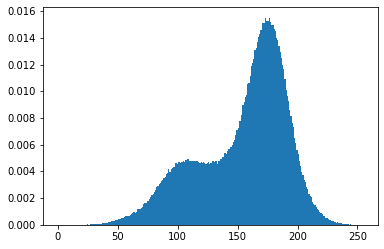

In [14]:
plt.hist(dental_noisy.ravel(),bins=bins3,density=True)
plt.show()

# Part 5:

First we should caclculate Noise variance (with eq 3-26 in gonzalez page 151):

In [15]:
hist_list=[]
for i in range(0,256):
    hist_list.append(0)
for i in range(dental_noisy.shape[0]):
    for j in range(dental_noisy.shape[1]):
        hist_list[dental_noisy[i][j]]+=1
total_sum=sum(hist_list)
for i in range(len(hist_list)):
    hist_list[i]/=total_sum

In [16]:
m=0
for i in range(0,256):
    m+=i*hist_list[i]

In [17]:
noise_variance=0
for i in range(0,256):
    noise_variance+=((i-m)**2)*hist_list[i]

now we can apply the adaptive local noise reduction 7x7 filter:

In [18]:
dental_noisy=dental_noisy.astype(np.float64)
denoised_dental_with_adaptive_local=dental_noisy.copy()

In [19]:
from tqdm import tqdm

In [20]:
for i in tqdm(range(dental_noisy.shape[0])):
    for j in range(dental_noisy.shape[1]):
        local_variance=0
        mean_local=0
        for m in range(-3,4):
            for n in range(-3,4):
                try:
                    tmp=dental_noisy[i+m][j+n]
                    mean_local+=tmp
                except:
                    mean_local+=0
        mean_local/=49
        for m in range(-3,4):
            for n in range(-3,4):
                try:
                    tmp=dental_noisy[i+m][j+n]-mean_local
                    local_variance+=tmp**2
                except:
                    local_variance+=(0-mean_local)**2
        local_variance/=49
        denoised_dental_with_adaptive_local[i][j]=dental_noisy[i][j]-(dental_noisy[i][j]-mean_local)*(noise_variance/local_variance)

100%|████████████████████████████████████████████████████████████████████████████████| 674/674 [01:25<00:00,  7.88it/s]


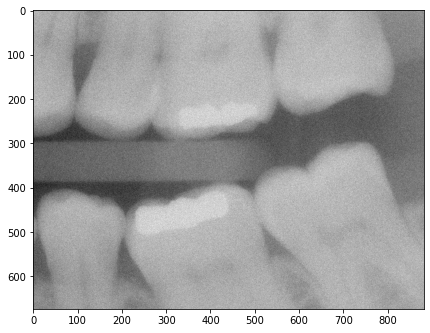

In [21]:
show(dental_noisy)

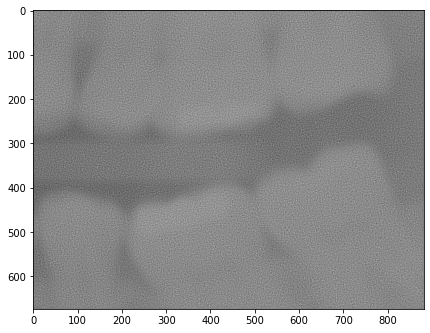

In [22]:
show(denoised_dental_with_adaptive_local,vmset=True)

# Part 6:

In [23]:
averaging_filtered_dental=cv2.blur(dental_noisy,(7,7))

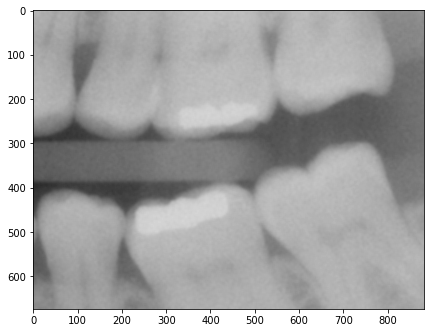

In [24]:
show(averaging_filtered_dental)